# Basic example for using AeroMAPS with Jupyter Notebook

This document represents both an example and a tutorial for using the basic functions of AeroMAPS to simulate and evaluate a transition scenario for the aviation sector.  It is written in the form of a Jupyter Notebook to facilitate its use. The user will be able to adapt this notebook and couple it with other notebooks proposed in the documentation.

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_emissions,
    models_sustainability,
    models_energy_cost,
    models_operation_cost_top_down,
)

In [2]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_emissions": models_emissions,
    "models_sustainability": models_sustainability,
    "models_energy_cost": models_energy_cost,
    "models_operation_cost_top_down": models_operation_cost_top_down,
}

# Default generic energy models and configuration used

In [3]:
process = create_process(configuration_file="data/config.json", models=models)

 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.
 WARNING - 19:09:22: The Args section is missing.


## Set up variables

The user can then set the different parameters of the model to generate its scenario. The list of the float inputs can be displayed using this command.

In [4]:
# process.list_float_inputs()

 In the following, some main parameters are for instance set up.

In [5]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = [2020, 2030, 2040, 2050]
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0, 2.0, 1.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [6]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 85.0  # 2019 value: 82.399312

In [7]:
# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.5]
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.5]
process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.5]

## Hydrogen aircraft
### Values for setting logistic functions by category
process.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process.parameters.hydrogen_introduction_year_short_range = 2035
process.parameters.fleet_renewal_duration = 20.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years = []
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years_values = [
    1.0
]

In [8]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [9]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

In [10]:
# Carbon offset
process.parameters.carbon_offset_baseline_level_vs_2019_reference_periods = [2020, 2024, 2050]
process.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0, 85.0]
process.parameters.residual_carbon_offset_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]

In [11]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
# process.parameters.waste_biomass = 12.0
# process.parameters.crops_biomass = 63.0
# process.parameters.forest_residues_biomass = 17.0
# process.parameters.agricultural_residues_biomass = 57.0
# process.parameters.algae_biomass = 15.0
# process.parameters.available_electricity = 250.0

In [12]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
# process.parameters.aviation_biomass_allocated_share = 5.0
# process.parameters.aviation_electricity_allocated_share = 5.0

## Compute

Once all the parameters have been set up, the user can compute.

In [13]:
import time

t1 = time.time()
process.compute()
print(time.time() - t1)
process.write_json()

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_mfsp_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


1.5778465270996094


## Results

The user can then display the results. The user has access to float outputs but also to annual data outputs, with the possibility of choosing the output.

In [14]:
process.data["float_outputs"]

{'cagr_rpk_short_range': 1.5291534592603684,
 'cagr_rpk_medium_range': 2.5948580077686634,
 'cagr_rpk_long_range': 2.5948580077686634,
 'cagr_rpk': 2.3354016834591818,
 'prospective_evolution_rpk_short_range': 57.66051931881591,
 'prospective_evolution_rpk_medium_range': 115.65912675438427,
 'prospective_evolution_rpk_long_range': 115.65912675438432,
 'prospective_evolution_rpk': 99.8835055319097,
 'cagr_rtk': 2.5948580077686634,
 'prospective_evolution_rtk': 115.65912675438419,
 'gross_carbon_budget': 1130.0,
 'gross_carbon_budget_2050': 797.2411428790518,
 'aviation_carbon_budget': 20.72826971485535,
 'world_temperature_target': 0.8,
 'aviation_temperature_target': 0.0304,
 'carbon_budget_consumed_share': 3.4474156741674546,
 'temperature_target_consumed_share': 4.968947860523166}

In [15]:
process.data["vector_outputs"]

,rpk_short_range_measures_impact,rpk_medium_range_measures_impact,rpk_long_range_measures_impact,rpk_short_range,rpk_medium_range,rpk_long_range,annual_growth_rate_passenger_short_range,annual_growth_rate_passenger_medium_range,annual_growth_rate_passenger_long_range,rpk,annual_growth_rate_passenger,rpk_reference,reference_annual_growth_rate_passenger,total_aircraft_distance_dropin_fuel,total_aircraft_distance_hydrogen,total_aircraft_distance_electric,rtk,annual_growth_rate_freight,rtk_reference,reference_annual_growth_rate_freight,ask,ask_short_range,ask_medium_range,ask_long_range,load_factor,operations_gain,operations_contrails_gain,operations_contrails_overconsumption,energy_per_ask_without_operations_short_range_dropin_fuel,energy_per_ask_without_operations_medium_range_dropin_fuel,energy_per_ask_without_operations_long_range_dropin_fuel,energy_per_ask_short_range_dropin_fuel_gain,energy_per_ask_medium_range_dropin_fuel_gain,energy_per_ask_long_range_dropin_fuel_gain,relative_energy_per_ask_hydrogen_wrt_dropin_short_range,relative_energy_per_ask_hydrogen_wrt_dropin_medium_range,relative_energy_per_ask_hydrogen_wrt_dropin_long_range,energy_per_ask_without_operations_short_range_hydrogen,energy_per_ask_without_operations_medium_range_hydrogen,energy_per_ask_without_operations_long_range_hydrogen,relative_energy_per_ask_electric_wrt_dropin_short_range,relative_energy_per_ask_electric_wrt_dropin_medium_range,relative_energy_per_ask_electric_wrt_dropin_long_range,energy_per_ask_without_operations_short_range_electric,energy_per_ask_without_operations_medium_range_electric,energy_per_ask_without_operations_long_range_electric,ask_short_range_hydrogen_share,ask_medium_range_hydrogen_share,ask_long_range_hydrogen_share,ask_short_range_electric_share,ask_medium_range_electric_share,ask_long_range_electric_share,ask_short_range_dropin_fuel_share,ask_medium_range_dropin_fuel_share,ask_long_range_dropin_fuel_share,ask_short_range_hydrogen,ask_medium_range_hydrogen,ask_long_range_hydrogen,ask_short_range_electric,ask_medium_range_electric,ask_long_range_electric,ask_short_range_dropin_fuel,ask_medium_range_dropin_fuel,ask_long_range_dropin_fuel,ask_dropin_fuel,ask_hydrogen,ask_electric,energy_per_rtk_without_operations_freight_dropin_fuel,rtk_hydrogen_share,rtk_dropin_fuel_share,rtk_electric_share,rtk_hydrogen,rtk_dropin_fuel,rtk_electric,energy_per_rtk_without_operations_freight_hydrogen,...,dropin_fuel_biomass_mean_unit_subsidy,dropin_fuel_biomass_mean_unit_tax,dropin_fuel_biomass_mean_unit_carbon_tax,dropin_fuel_electricity_mean_co2_emission_factor,dropin_fuel_electricity_mean_mfsp,dropin_fuel_electricity_mean_net_mfsp,dropin_fuel_electricity_mean_net_mfsp_without_carbon_tax,dropin_fuel_electricity_mean_carbon_tax_supplement,dropin_fuel_electricity_marginal_net_mfsp,dropin_fuel_electricity_mean_unit_subsidy,dropin_fuel_electricity_mean_unit_tax,dropin_fuel_electricity_mean_unit_carbon_tax,dropin_fuel_mean_co2_emission_factor,dropin_fuel_mean_mfsp,dropin_fuel_mean_net_mfsp,dropin_fuel_mean_net_mfsp_without_carbon_tax,dropin_fuel_mean_carbon_tax_supplement,dropin_fuel_marginal_net_mfsp,dropin_fuel_mean_unit_subsidy,dropin_fuel_mean_unit_tax,dropin_fuel_mean_unit_carbon_tax,hydrogen_fossil_mean_co2_emission_factor,hydrogen_fossil_mean_mfsp,hydrogen_fossil_mean_net_mfsp,hydrogen_fossil_mean_net_mfsp_without_carbon_tax,hydrogen_fossil_mean_carbon_tax_supplement,hydrogen_fossil_marginal_net_mfsp,hydrogen_fossil_mean_unit_subsidy,hydrogen_fossil_mean_unit_tax,hydrogen_fossil_mean_unit_carbon_tax,hydrogen_electricity_mean_co2_emission_factor,hydrogen_electricity_mean_mfsp,hydrogen_electricity_mean_net_mfsp,hydrogen_electricity_mean_net_mfsp_without_carbon_tax,hydrogen_electricity_mean_carbon_tax_supplement,hydrogen_electricity_marginal_net_mfsp,hydrogen_electricity_mean_unit_subsidy,hydrogen_electricity_mean_unit_tax,hydrogen_electricity_mean_unit_carbon_tax,hydrogen_mean_co2_emission_factor,hydrogen_mean_mfsp,hydrogen_mean_net_mfsp,hydrog

In [16]:
process.data["climate_outputs"][["co2_emissions"]]

,co2_emissions
1940,35.135888
1941,37.952826
1942,40.986452
1943,44.269269
1944,47.812110
1945,51.636646
1946,55.764544
1947,60.228308
1948,65.038772
1949,70.250107


The user can write the results to an Excel file with the following command.

In [17]:
process.write_excel(file_name="aeromaps_data.xlsx")

## Plots

Lastly, the user can also plot different parameters based on a database of plots. The list of the available plots can be displayed using the following command.

In [18]:
process.list_available_plots()

['air_transport_co2_emissions',
 'air_transport_climate_impacts',
 'carbon_budget_assessment',
 'temperature_target_assessment',
 'biomass_resource_budget_assessment',
 'electricity_resource_budget_assessment',
 'multidisciplinary_assessment',
 'temperature_increase_from_air_transport',
 'detailed_temperature_increase_from_air_transport',
 'biomass_consumption',
 'electricity_consumption',
 'co2_per_rpk',
 'co2_per_rtk',
 'passenger_kaya_factors',
 'freight_kaya_factors',
 'levers_of_action_distribution',
 'revenue_passenger_kilometer',
 'revenue_tonne_kilometer',
 'available_seat_kilometer',
 'total_aircraft_distance',
 'load_factor',
 'energy_per_ask',
 'energy_per_rtk',
 'energy_consumption',
 'fuel_consumption_liter_per_pax_100km',
 'mean_fuel_emission_factor',
 'emission_factor_per_fuel_category',
 'emission_factor_per_fuel',
 'fuel_shares',
 'cumulative_co2_emissions',
 'direct_h2o_emissions',
 'direct_nox_emissions',
 'direct_sulfur_emissions',
 'direct_soot_emissions',
 'carbon

The user can thus display a figure of this list, for instance the CO<sub>2</sub> emissions of the simulated scenario.

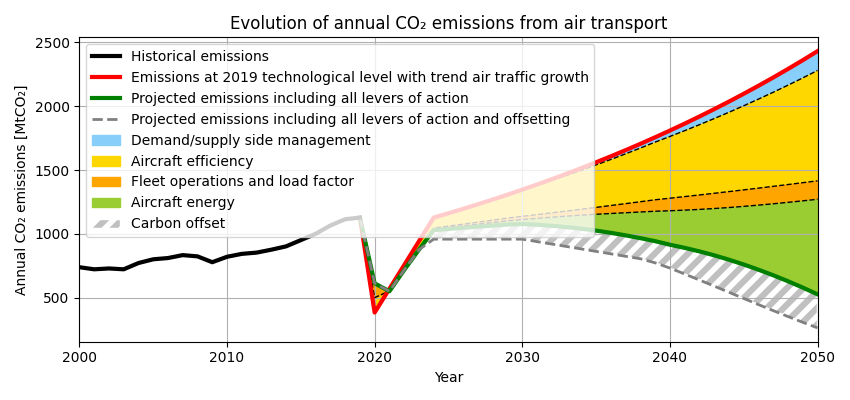

In [19]:
process.plot("air_transport_co2_emissions", save=False)

In [20]:
# Verify the outputs between .outputs.json and data/reference/outputs.json
from aeromaps.utils.functions import compare_json_files

files_are_different = compare_json_files(
    "./data/reference/outputs.json",
    "./data/outputs.json",
    rtol=0.0001,
    atol=0,
)

if files_are_different:
    raise ValueError("The outputs.json files are different.")

Differences found:
{
  "dictionary_item_added": [
    "root['float_inputs']['historical_temperature_increase']",
    "root['float_inputs']['temperature_target']",
    "root['float_inputs']['aviation_temperature_target_allocated_share']",
    "root['float_outputs']['world_temperature_target']",
    "root['float_outputs']['aviation_temperature_target']",
    "root['float_outputs']['temperature_target_consumed_share']",
    "root['climate_outputs']['contrails_distance_corrected']",
    "root['climate_outputs']['total_rf']",
    "root['climate_outputs']['co2_rf']",
    "root['climate_outputs']['non_co2_erf']",
    "root['climate_outputs']['non_co2_rf']",
    "root['climate_outputs']['contrails_rf']",
    "root['climate_outputs']['nox_short_term_o3_increase_rf']",
    "root['climate_outputs']['nox_long_term_o3_decrease_rf']",
    "root['climate_outputs']['nox_ch4_decrease_rf']",
    "root['climate_outputs']['nox_stratospheric_water_vapor_decrease_rf']",
    "root['climate_outputs']['h2o_rf'

ValueError: The outputs.json files are different.

In [ ]:
from aeromaps.utils.functions import clean_notebooks_on_tests

clean_notebooks_on_tests(globals())